In [33]:
from models.mnist_classifier.lenet import LeNet5, LeNet1
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets.mnist import MNIST
from torchvision.datasets import FashionMNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset, TensorDataset, ConcatDataset
import random
import os
from  PIL import Image
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision import transforms,utils,datasets
import numpy as np
from torch import optim
import time
import torchvision.models as models
from pylab import *

device = "cuda:0" if torch.cuda.is_available() else "cpu"

In [34]:
data_root = './autodl-tmp/mnist'
data_train = MNIST(data_root,
                   train=True,
                   download=True,
                   transform=transforms.Compose([
                       transforms.Resize((32, 32)),
                       transforms.ToTensor(),
                       transforms.Normalize((0.5,), (0.5,))]))
data_test = MNIST(data_root,
                  train=False,
                  download=True,
                  transform=transforms.Compose([
                       transforms.Resize((32, 32)),
                       transforms.ToTensor(),
                       transforms.Normalize((0.5,), (0.5,))]))

In [35]:
len(data_train)

60000

In [36]:
data_train_loader = DataLoader(data_train, batch_size=256, shuffle=True, num_workers=8)
data_test_loader = DataLoader(data_test, batch_size=256, num_workers=8)

In [37]:
net = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=1e-4)  #学习率，太高如2e-3会立马收敛，cagfuzz里设置为0.05

In [38]:
epoch = 100

In [39]:
def train(epoch):
    global cur_batch_win
    net.train()
    loss_list, batch_list = [], []
    total_correct = 0
    for i, (images, labels) in enumerate(data_train_loader):
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = net(images)
        loss = criterion(output, labels)
        loss_list.append(loss.detach().cpu().item())
        batch_list.append(i+1)
        pred = output.detach().max(1)[1]
        total_correct += pred.eq(labels.view_as(pred)).sum()
        # if i % 10 == 0:
            # print('Train - Epoch %d, Batch: %d, Loss: %f' % (epoch, i, loss.detach().cpu().item()))
        loss.backward()
        optimizer.step()
    avg_loss = sum(loss_list) / len(loss_list)
    acc = float(total_correct) / len(data_train)
    print('Train Avg. Loss: %f, Accuracy: %f' % (avg_loss, acc))
    return acc, avg_loss

In [40]:
def test():
    net.eval()
    batch_list = []
    with torch.no_grad():
        total_correct = 0
        avg_loss = 0.0
        for i, (images, labels) in enumerate(data_test_loader):
            images = images.to(device)
            labels = labels.to(device)
            output = net(images)
            avg_loss += criterion(output, labels).sum()
            pred = output.detach().max(1)[1]
            total_correct += pred.eq(labels.view_as(pred)).sum()
            batch_list.append(i+1)

    avg_loss /= batch_list[-1]
    avg_loss = avg_loss.detach().cpu().item()
    acc = float(total_correct) / len(data_test)
    print('Test Avg. Loss: %f, Accuracy: %f' % (avg_loss, acc))
    return acc, avg_loss

In [41]:
def train_and_test(epoch):
    print('training...')
    acc, loss = train(epoch)
    val_acc, val_loss = test()
    return acc, loss, val_acc, val_loss

In [42]:
acc, loss, val_acc, val_loss = [], [], [], []

for e in range(epoch):
    a, b, c, d = train_and_test(e)
    acc.append(a)
    loss.append(b)
    val_acc.append(c)
    val_loss.append(d)
    print(f'lenet_epoch={e} test_acc={c:0.3f}')
    #if e % 2 == 0:
     #   torch.save(net.state_dict(), f'autodl-tmp/save_model/mnist/Lenet5/lenet_epoch={e}_test_acc={acc:0.3f}.pth')
#    torch.save(net.state_dict(), f'autodl-tmp/save_model/fashion/Lenet1/lenet_epoch={e}_test_acc={acc:0.3f}.pth')

training...
Train Avg. Loss: 1.588085, Accuracy: 0.584067
Test Avg. Loss: 0.586714, Accuracy: 0.835100
lenet_epoch=0 test_acc=0.835
training...
Train Avg. Loss: 0.438479, Accuracy: 0.872683
Test Avg. Loss: 0.319968, Accuracy: 0.906700
lenet_epoch=1 test_acc=0.907
training...
Train Avg. Loss: 0.299642, Accuracy: 0.912600
Test Avg. Loss: 0.241870, Accuracy: 0.929800
lenet_epoch=2 test_acc=0.930
training...
Train Avg. Loss: 0.241221, Accuracy: 0.928867
Test Avg. Loss: 0.196698, Accuracy: 0.940800
lenet_epoch=3 test_acc=0.941
training...
Train Avg. Loss: 0.202142, Accuracy: 0.940033
Test Avg. Loss: 0.169269, Accuracy: 0.947400
lenet_epoch=4 test_acc=0.947
training...
Train Avg. Loss: 0.174412, Accuracy: 0.947950
Test Avg. Loss: 0.143330, Accuracy: 0.953700
lenet_epoch=5 test_acc=0.954
training...
Train Avg. Loss: 0.153771, Accuracy: 0.954450
Test Avg. Loss: 0.128041, Accuracy: 0.958600
lenet_epoch=6 test_acc=0.959
training...
Train Avg. Loss: 0.137283, Accuracy: 0.959400
Test Avg. Loss: 0.

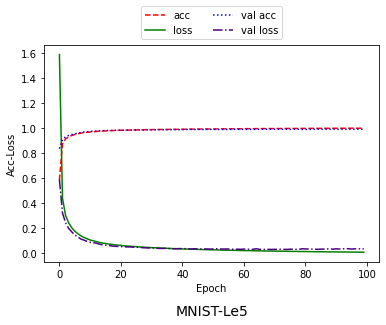

In [48]:
x = np.arange(epoch)
plt.plot(x, acc, color='red', linestyle='--', label="acc")
plt.plot(x, loss, color='green', label="loss")
plt.plot(x, val_acc, color='blue', linestyle='dotted', label="val acc")
plt.plot(x, val_loss, color='indigo', linestyle='dashdot', label="val loss")
plt.title('MNIST-Le5', fontsize=14, y=-0.27)
plt.xlabel('Epoch')
plt.ylabel('Acc-Loss')
plt.xticks(ticks=[0,20,40,60,80,100])
# 添加图例
plt.legend(loc='center',bbox_to_anchor=(0.5, 1.1),ncol=2)
plt.show()

In [44]:
val_acc

[0.8351,
 0.9067,
 0.9298,
 0.9408,
 0.9474,
 0.9537,
 0.9586,
 0.9641,
 0.9675,
 0.9704,
 0.9731,
 0.9741,
 0.9754,
 0.9767,
 0.9787,
 0.9797,
 0.9803,
 0.9809,
 0.9815,
 0.9824,
 0.9825,
 0.9826,
 0.9829,
 0.9836,
 0.9834,
 0.9835,
 0.9844,
 0.9849,
 0.985,
 0.9856,
 0.9852,
 0.9858,
 0.9874,
 0.9868,
 0.987,
 0.9867,
 0.9876,
 0.9874,
 0.9877,
 0.9869,
 0.9868,
 0.988,
 0.9891,
 0.9885,
 0.9881,
 0.9885,
 0.9883,
 0.9881,
 0.9888,
 0.9893,
 0.9882,
 0.9887,
 0.9881,
 0.9885,
 0.9888,
 0.9888,
 0.9893,
 0.9899,
 0.9887,
 0.9897,
 0.989,
 0.989,
 0.9893,
 0.9898,
 0.9886,
 0.9895,
 0.9902,
 0.9902,
 0.9896,
 0.9903,
 0.9905,
 0.9896,
 0.9889,
 0.9904,
 0.9905,
 0.9892,
 0.9902,
 0.9902,
 0.9903,
 0.9888,
 0.9891,
 0.989,
 0.9895,
 0.99,
 0.9903,
 0.99,
 0.99,
 0.9898,
 0.9901,
 0.9909,
 0.9887,
 0.9899,
 0.9895,
 0.9898,
 0.9898,
 0.99,
 0.9896,
 0.9906,
 0.9896,
 0.9908]

In [45]:
val_loss

[0.5867142081260681,
 0.31996819376945496,
 0.2418697327375412,
 0.19669769704341888,
 0.16926907002925873,
 0.1433296799659729,
 0.1280411183834076,
 0.11163931339979172,
 0.10269566625356674,
 0.09262242168188095,
 0.08503689616918564,
 0.0823058933019638,
 0.07853104919195175,
 0.07036716490983963,
 0.06602461636066437,
 0.0621492937207222,
 0.06053561717271805,
 0.05635826662182808,
 0.05351705476641655,
 0.052148014307022095,
 0.05118453502655029,
 0.04923870414495468,
 0.04861628636717796,
 0.04845558479428291,
 0.04659086838364601,
 0.04531506821513176,
 0.04581327363848686,
 0.042269766330718994,
 0.04120878502726555,
 0.04001031443476677,
 0.041520874947309494,
 0.039353303611278534,
 0.03713414818048477,
 0.03633537143468857,
 0.03662741556763649,
 0.03861164674162865,
 0.03435453027486801,
 0.03378274664282799,
 0.03322469815611839,
 0.03541674464941025,
 0.03444419428706169,
 0.03450210765004158,
 0.03326384723186493,
 0.031670015305280685,
 0.034307707101106644,
 0.0308969

In [46]:
acc

[0.5840666666666666,
 0.8726833333333334,
 0.9126,
 0.9288666666666666,
 0.9400333333333334,
 0.94795,
 0.95445,
 0.9594,
 0.9633333333333334,
 0.9659666666666666,
 0.9683166666666667,
 0.9703333333333334,
 0.9727,
 0.9742166666666666,
 0.9761,
 0.9768833333333333,
 0.9785333333333334,
 0.9793333333333333,
 0.9805333333333334,
 0.9810666666666666,
 0.9821833333333333,
 0.98275,
 0.9829666666666667,
 0.9840666666666666,
 0.98465,
 0.98465,
 0.9855833333333334,
 0.9861,
 0.9863666666666666,
 0.9868166666666667,
 0.9873333333333333,
 0.9877,
 0.9878166666666667,
 0.98845,
 0.98835,
 0.98875,
 0.9891333333333333,
 0.98945,
 0.9894166666666667,
 0.9897,
 0.9904333333333334,
 0.9905166666666667,
 0.9910333333333333,
 0.99125,
 0.9911166666666666,
 0.99155,
 0.99185,
 0.9920333333333333,
 0.9922,
 0.9921666666666666,
 0.9923833333333333,
 0.9924666666666667,
 0.9927666666666667,
 0.9934833333333334,
 0.9934,
 0.9935833333333334,
 0.9935333333333334,
 0.99365,
 0.9939833333333333,
 0.993716666

In [47]:
loss

[1.5880854753737754,
 0.43847932111709675,
 0.29964203618942425,
 0.24122062293773003,
 0.20214184817481548,
 0.17441217287423763,
 0.15377058000006574,
 0.13728262051305873,
 0.12368026245781716,
 0.11327327329744684,
 0.10404365225992304,
 0.09733821686277998,
 0.091024592653551,
 0.08487073820322118,
 0.0797585341762355,
 0.07595679775831547,
 0.07210055380425555,
 0.06851772302959827,
 0.06504325344365962,
 0.06287716470975825,
 0.06057274829041451,
 0.057600505705526536,
 0.05549635279210324,
 0.05359888739012023,
 0.05207078975645152,
 0.05039053784802239,
 0.048352433257597555,
 0.04679548352401942,
 0.045765520584710104,
 0.04416149788476685,
 0.04260220726991588,
 0.041570510295160276,
 0.04040618302260942,
 0.039264791066500736,
 0.03864951662501281,
 0.037200710415206055,
 0.03623170710981209,
 0.034984084490211086,
 0.034728020841770985,
 0.033404204566428,
 0.03227654196361595,
 0.03187018776153947,
 0.03085395483736028,
 0.02994404696522558,
 0.02959120262691632,
 0.02868